## Implementacja bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.graphics.gofplots import qqplot
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import erf

### Zadanie 2.2

In [36]:
pi = [0.11,0.12,0.27,0.19,0.31] # prawdopodobieństwo kolejnych X = i, i = 0,1,2,3,4,5
qi = 0.2                        # prawdopodobieństwo wylosowania liczby ze zbioru {1,2,3,4,5}
c = 0.31/0.2                    # max pi[i]/qi

In [37]:
def accept(n):
    '''implementacja algorytmu metody akceptacji-odrzucenia 
       z wykorzystaniem rozkładu jednostajnego'''
    
    values = []
    for i in range(n):
        u1 = np.random.randint(1,6)
        u2 = np.random.uniform(0,1)
        while u2 > pi[u1-1]/(c*qi):
            u1 = np.random.randint(1,6)
            u2 = np.random.uniform(0,1)
        values.append(u1)
    return sorted(values)

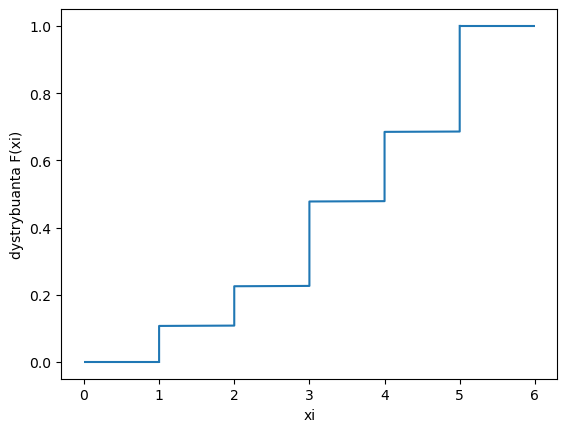

In [38]:
x = np.linspace(0,1,1000)
plt.plot(accept(1000),x)
plt.hlines(0,xmin=0,xmax=1)
plt.hlines(1,xmin=5,xmax=6)
plt.xlabel('xi')
plt.ylabel('dystrybuanta F(xi)')
plt.show()

### Zadanie 2.3

In [39]:
def accept(f,a,b,n,C):
    """f - gęstość,
    [a,b] - przedział z którego generujemy rozkład jednostajny,
    C - max wartość gęstości f = 1/sqrt(3),
    n - liczba prób"""
    
    values = []
    for i in range(n):
        u1 = np.random.uniform(a,b)
        u2 = np.random.uniform(0,C)
        while u2 > f(u1):
            u1 = np.random.uniform(a,b)
            u2 = np.random.uniform(0,C)
        values.append(u1)
    return values

def f(x):
    '''density f'''
    return 1.5*np.sin(x)*(np.cos(x))**2

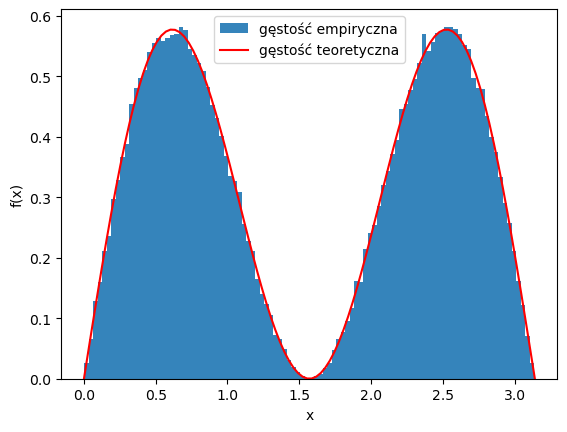

In [40]:
plt.hist(accept(f,0,np.pi,100000,1/np.sqrt(3)),bins=100,density=True,alpha=0.9,label='gęstość empiryczna')
x = np.linspace(0,np.pi,100)
plt.plot(x,f(x),color='r',label='gęstość teoretyczna')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Zadanie 2.1

In [2]:
def f_normal(x, mu, sigma):
    f = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)
    return f

def f_cauchy(x, m, l):
    f = l/np.pi * 1/(1 + (l*(x-m))**2)
    return f

def accept_cauchy(mu, sigma, n):
    '''metoda akceptacji-odrzucenia dla rozkładu normalnego
       z wykorzystaniem rozkładu Cauchy'ego'''
    y = 1 / (sigma * np.sqrt(2 * np.pi))
    values = []
    while len(values) < n:
        x = np.random.normal(mu,sigma)
        y = np.random.uniform(0,y)
        while f_cauchy(y,mu,sigma) > f_normal(x,mu,sigma):
            x = np.random.normal(mu,sigma)
            y = np.random.uniform(0,y)
        values.append(x)
    return np.array(values)

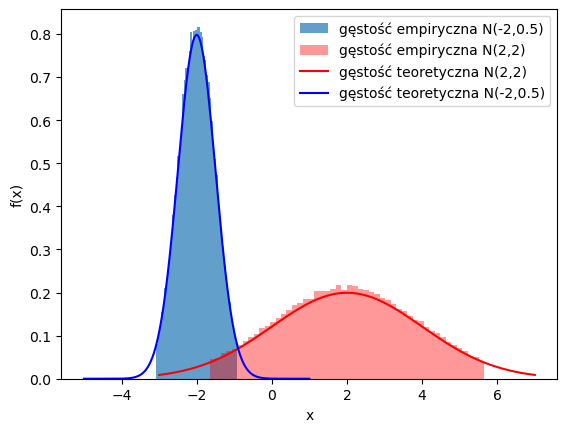

In [6]:
plt.hist(accept_cauchy(-2,0.5,100000),bins=50,density=True,alpha=0.7,label='gęstość empiryczna N(-2,0.5)')
plt.hist(accept_cauchy(2,2,100000),bins=50,color='r',density=True,alpha=0.4,label='gęstość empiryczna N(2,2)')
x = np.linspace(-3,7,1000)
x2 = np.linspace(-5,1,1000)
plt.plot(x, st.norm.pdf(x,loc=2, scale=2),color='r',label='gęstość teoretyczna N(2,2)')
plt.plot(x2, st.norm.pdf(x2,loc=-2,scale=0.5),color='b',label='gęstość teoretyczna N(-2,0.5)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

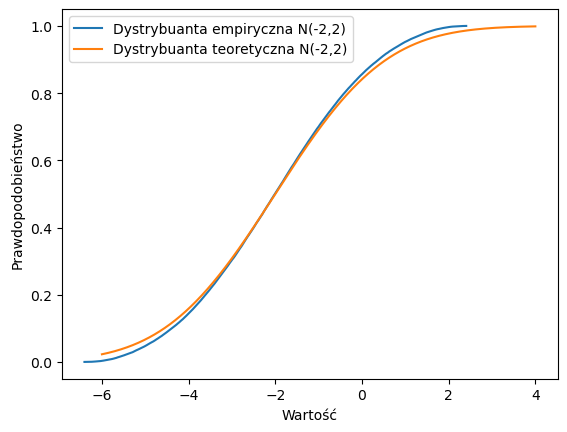

In [43]:
data = accept_cauchy(-2,2,100000)
ecdf = ECDF(data)
x = np.linspace(-6,4,1000)
plt.plot(ecdf.x, ecdf.y, label="Dystrybuanta empiryczna N(-2,2)")
plt.plot(x, st.norm.cdf(x, loc=-2, scale=2), label="Dystrybuanta teoretyczna N(-2,2)")
plt.xlabel('Wartość')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.show()

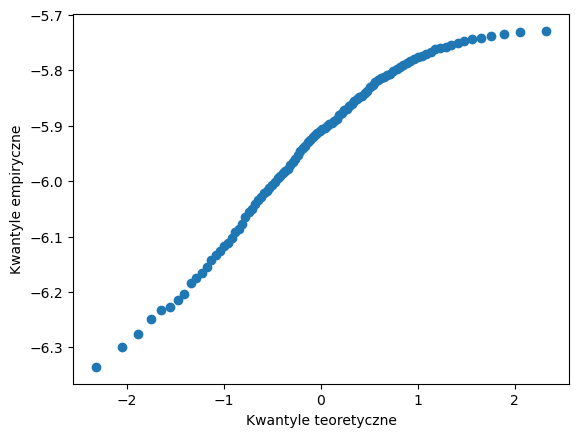

In [44]:
data_0_1 = accept_cauchy(0,1,100000)
teo_q = st.norm.ppf(np.linspace(0.01, 0.99, 100))
emp_q = np.percentile(data, np.linspace(0.01, 0.99, 100))
plt.plot(teo_q, emp_q, 'o')
plt.xlabel('Kwantyle teoretyczne')
plt.ylabel('Kwantyle empiryczne')
plt.show()

In [45]:
mean = np.mean(data)
variance = np.var(data)

print(f"Średnia: {mean}")
print(f"Wariancja: {variance}")

Średnia: -2.0068237669382545
Wariancja: 3.1534864738584187


### Zadanie 1

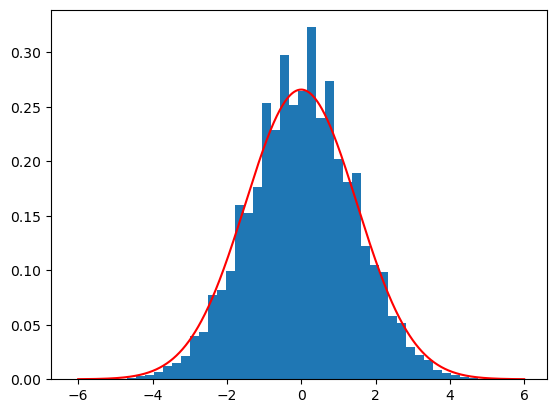

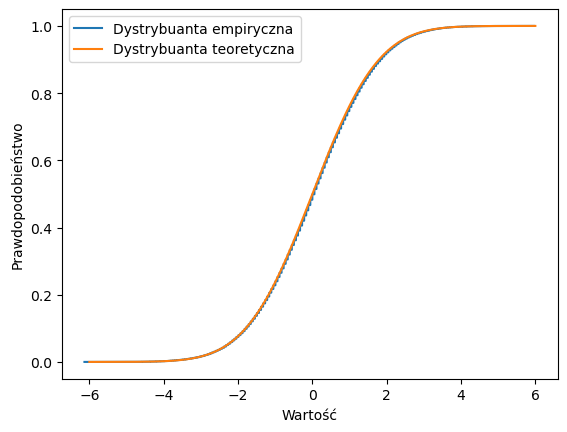

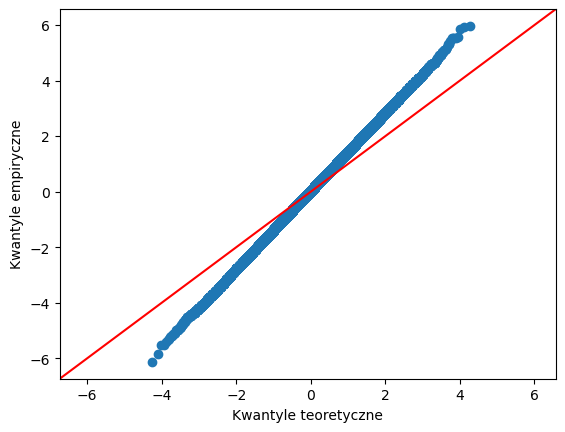

In [46]:
def inverse_F(F, u, delta_x):
    x_min, x_max = -10, 10  # zakładamy przedział poszukiwania miejsca zerowego
    while x_max - x_min > delta_x:
        x_mid = (x_min + x_max) / 2
        if F(x_mid) < u:
            x_min = x_mid
        else:
            x_max = x_mid
    return x_max  # zwracamy prawą granicę przedziału, jako przybliżenie F^(-1)(u)

def normal(x):
    return 0.5 * (1 + erf(x / np.sqrt(2)))

def normal_sample(n, delta_x):
    samples = []
    for i in range(n):
        u = np.random.uniform()
        x = inverse_F(normal, u, delta_x)
        samples.append(np.sqrt(2) * x)
    return np.array(samples)

x = np.linspace(-6,6,1000)
samples = normal_sample(100000, 0.05)
plt.hist(samples, bins=50, density=True, label='gęstość empiryczna N')
plt.plot(x,st.norm.pdf(x, loc=0,scale=1.5),color='r', label='gęstość teoretyczna N')
plt.show()

ecdf = ECDF(samples)
plt.plot(ecdf.x, ecdf.y, label="Dystrybuanta empiryczna")
plt.plot(x, st.norm.cdf(x, loc=0,scale=1.4), label="Dystrybuanta teoretyczna")
plt.xlabel('Wartość')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.show()

qqplot(samples, line = "45")
plt.xlabel('Kwantyle teoretyczne')
plt.ylabel('Kwantyle empiryczne')
plt.show()

# nie do końca jestem pewny dlaczego wychodzi N(0,~1.5), czy wynika to z błędu erf?